## 1. EDA-Exploratory Data Analysis

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/jigsaw-toxic-comment-classification-challenge.zip

Archive:  gdrive/My Drive/jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_labels.csv         
  inflating: train.csv               


In [4]:
data_raw = pd.read_csv('train.csv')
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(159571, 8)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("Sample data:")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8


Sample data:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 1.1. Checking for missing values

In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 1.2. Calculating number of comments under each label

In [7]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [8]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [9]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


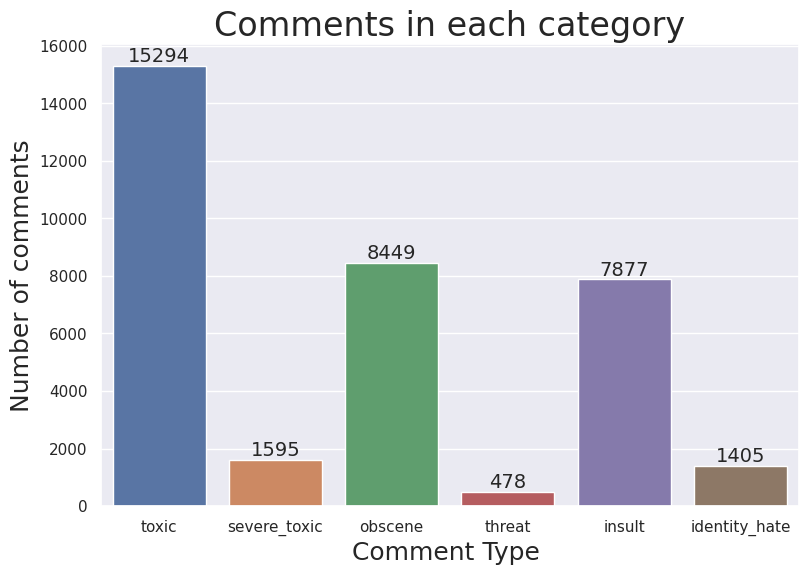

In [10]:
sns.set(font_scale = 1)
plt.figure(figsize=(9,6))

ax= sns.barplot(x=categories,y= data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=14)

plt.show()

### 1.3. Calculating number of comments having multiple labels

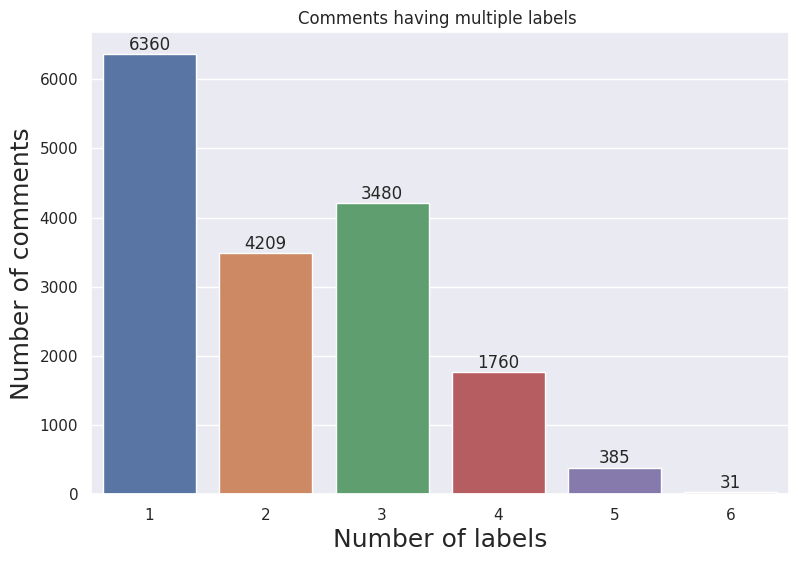

In [11]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 1)
plt.figure(figsize=(9,6))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## 2. Data Pre-Processing

In [12]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [14]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [15]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
109762,4b17ea6037b8a935,moving of dont stop til you get enough and sho...,0,0,0,0,0,0
58748,9d54e3b1059e33db,no idea but i think the unauthenticated votes ...,0,0,0,0,0,0
87481,ea09402fb7bd890b,spam please do not add advertising or inapprop...,0,0,0,0,0,0
54133,90a364a227c17016,krishan and the samkhya panth i will add the ...,0,0,0,0,0,0
25188,42a6392f4e2234cf,could well be and from your other edits you do...,0,0,0,0,0,0


### 2.2. Removing Stop Words

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
109762,4b17ea6037b8a935,moving dont stop til get enough shop til d...,0,0,0,0,0,0
58748,9d54e3b1059e33db,idea think unauthenticated votes casted ...,0,0,0,0,0,0
87481,ea09402fb7bd890b,spam please add advertising inappropriate e...,0,0,0,0,0,0
54133,90a364a227c17016,krishan samkhya panth add following text...,0,0,0,0,0,0
25188,42a6392f4e2234cf,could well edits look like know youre...,0,0,0,0,0,0


### 2.3. Stemming

In [18]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
109762,4b17ea6037b8a935,move dont stop til get enough shop til drop no...,0,0,0,0,0,0
58748,9d54e3b1059e33db,idea think unauthent vote cast side indent rem...,0,0,0,0,0,0
87481,ea09402fb7bd890b,spam pleas add advertis inappropri extern link...,0,0,0,0,0,0
54133,90a364a227c17016,krishan samkhya panth add follow text articl l...,0,0,0,0,0,0
25188,42a6392f4e2234cf,could well edit look like know your talk contr...,0,0,0,0,0,0


### 2.4. Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [20]:
train_text = train['comment_text']
test_text = test['comment_text']

### 2.5. TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [22]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [24]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('Processing {} comments...'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

Processing toxic comments...
Test accuracy is 0.8933333333333333


Processing severe_toxic comments...
Test accuracy is 0.9866666666666667


Processing obscene comments...
Test accuracy is 0.945


Processing threat comments...
Test accuracy is 0.9983333333333333


Processing insult comments...
Test accuracy is 0.9483333333333334


Processing identity_hate comments...
Test accuracy is 0.9883333333333333


CPU times: user 133 ms, sys: 75.9 ms, total: 209 ms
Wall time: 2.99 s


### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [25]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.0 MB/s eta 0:00:00


In [26]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
BinRel = BinaryRelevance(GaussianNB())

# train
BinRel.fit(x_train, y_train)

# predict
predictions = BinRel.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8433333333333334


CPU times: user 6.03 s, sys: 6.55 s, total: 12.6 s
Wall time: 13.2 s


In [27]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [28]:
print('Classification Report:\n',classification_report(y_test, predictions, target_names=categories))

Classification Report:
                precision    recall  f1-score   support

        toxic       0.38      0.25      0.30        64
 severe_toxic       0.00      0.00      0.00         8
      obscene       0.26      0.18      0.21        33
       threat       0.00      0.00      0.00         1
       insult       0.33      0.23      0.27        31
identity_hate       0.00      0.00      0.00         7

    micro avg       0.32      0.20      0.25       144
    macro avg       0.16      0.11      0.13       144
 weighted avg       0.30      0.20      0.24       144
  samples avg       0.02      0.02      0.02       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3. Classifier Chains

In [29]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [30]:
%%time

# initialize classifier chains multi-label classifier
CC = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
CC.fit(x_train, y_train)

# predict
predictions = CC.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8833333333333333


CPU times: user 28.9 s, sys: 12 s, total: 40.8 s
Wall time: 39.9 s


In [31]:
print('Classification Report:\n',classification_report(y_test, predictions, target_names=categories))

Classification Report:
                precision    recall  f1-score   support

        toxic       0.00      0.00      0.00        64
 severe_toxic       0.00      0.00      0.00         8
      obscene       0.00      0.00      0.00        33
       threat       0.00      0.00      0.00         1
       insult       0.00      0.00      0.00        31
identity_hate       0.00      0.00      0.00         7

    micro avg       0.00      0.00      0.00       144
    macro avg       0.00      0.00      0.00       144
 weighted avg       0.00      0.00      0.00       144
  samples avg       0.00      0.00      0.00       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

### 3.4. Label Powerset

In [32]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [33]:
%%time

# initialize label powerset multi-label classifier
LP = LabelPowerset(LogisticRegression())

# train
LP.fit(x_train, y_train)

# predict
predictions = LP.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8833333333333333


CPU times: user 36.4 s, sys: 12.1 s, total: 48.5 s
Wall time: 43.6 s


In [34]:
print('Classification Report:\n',classification_report(y_test, predictions, target_names=categories))

Classification Report:
                precision    recall  f1-score   support

        toxic       0.00      0.00      0.00        64
 severe_toxic       0.00      0.00      0.00         8
      obscene       0.00      0.00      0.00        33
       threat       0.00      0.00      0.00         1
       insult       0.00      0.00      0.00        31
identity_hate       0.00      0.00      0.00         7

    micro avg       0.00      0.00      0.00       144
    macro avg       0.00      0.00      0.00       144
 weighted avg       0.00      0.00      0.00       144
  samples avg       0.00      0.00      0.00       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.